In [277]:
import csv as csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
#loading the data
data = pd.read_csv('mass_shootings.csv')

In [235]:
data.head()

,Case,Location,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of mental health issues,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,...,TBD,semiautomatic rifle; shotgun,NaN,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,NaN,NaN,Mass
1,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,...,A Florida pawn shop,semiautomatic rifle,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,NaN,NaN,Mass
2,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,...,TBD,semiautomatic rifle and semiautomatic handgun,NaN,White,M,http://www.wpxi.com/news/top-stories/family-me...,NaN,NaN,NaN,Mass
3,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,...,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,NaN,NaN,NaN,Spree
4,Texas First Baptist Church massacre,"Sutherland Springs, TX",11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46+,Religious,Yes,...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass


In [236]:
#group by year to find total fatalities 
yr_tot_fatal = data.groupby(["Year"])['Fatalities'].sum()
yr_tot = data.groupby(["Year"])['Fatalities'].count()

In [237]:
data['Fatalities'][data['Year'] == 2018].sum()

24

In [238]:
shootings = []
fatalities = []
for i in range(1982,2019):
    num = data['Case'][data['Year'] == i].count()
    vic = data['Fatalities'][data['Year'] == i].sum()
    shootings.append(num)
    fatalities.append(vic)
    
    

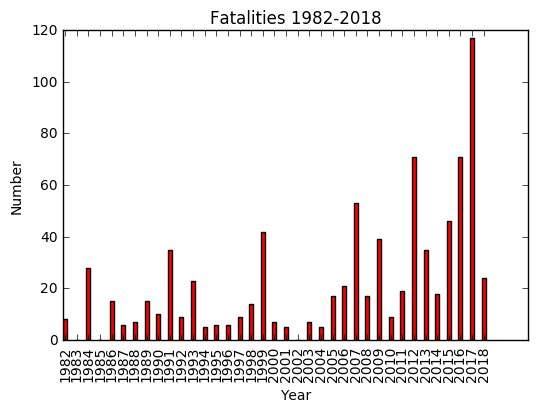

In [239]:
#bar graph for fatalities 

N = len(shootings)

fat = fatalities
tot = shootings

years = range(1982,2019)

ind = np.arange(N)  # the x locations for the groups
width = 0.35 #width of bars

fig, ax = plt.subplots()

g1 = ax.bar(ind, fat, width, color = 'r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number')
ax.set_title('Fatalities 1982-2018')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(years, rotation = 90)

ax.set_xlabel('Year')


plt.show()

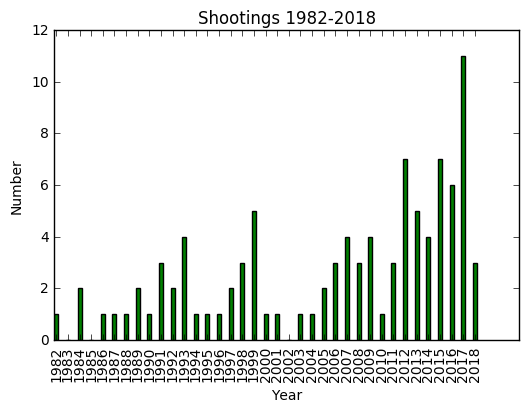

In [240]:
#bar graph for fatalities 

N = len(shootings)

fat = fatalities
tot = shootings

years = range(1982,2019)

ind = np.arange(N)  # the x locations for the groups
width = 0.35 #width of bars

fig, ax = plt.subplots()

#g1 = ax.bar(ind, fat, width, color = 'r')
g2 = ax.bar(ind, tot, width, color = 'g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number')
ax.set_title('Shootings 1982-2018')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(years, rotation = 90)

ax.set_xlabel('Year')

#ax.legend((g1[0], g2[0]), ('Fatalities', 'Shootings'), loc = 'upper left')

plt.show()

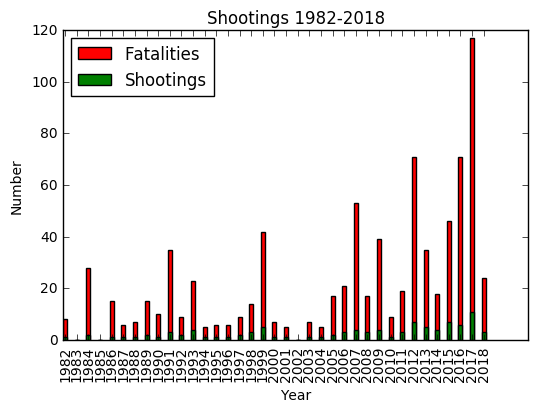

In [241]:
#bar graph for fatalities 

N = len(shootings)

fat = fatalities
tot = shootings

years = range(1982,2019)

ind = np.arange(N)  # the x locations for the groups
width = 0.35 #width of bars

fig, ax = plt.subplots()

g1 = ax.bar(ind, fat, width, color = 'r')
g2 = ax.bar(ind, tot, width, color = 'g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number')
ax.set_title('Shootings 1982-2018')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(years, rotation = 90)

ax.set_xlabel('Year')

ax.legend((g1[0], g2[0]), ('Fatalities', 'Shootings'), loc = 'upper left')

plt.show()

In [242]:
#unique outputs for this feature
how = data['Weapons obtained legally'].unique()
how

array(['Yes', 'TBD', 'No',
       'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI',
       'Unknown', '\nYes',
       'Yes ("some of the weapons were purchased legally and some of them may not have been")',
       'Yes '], dtype=object)

In [243]:
#fix up the messy data to make all 'yes' the same
data['Weapons obtained legally'] = data['Weapons obtained legally'].replace('Yes ', 'Yes')
data['Weapons obtained legally'] = data['Weapons obtained legally'].replace('\nYes', 'Yes')

In [244]:
how = data['Weapons obtained legally'].unique()
how

array(['Yes', 'TBD', 'No',
       'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI',
       'Unknown',
       'Yes ("some of the weapons were purchased legally and some of them may not have been")'], dtype=object)

In [245]:
yes = data['Case'][data['Weapons obtained legally'] == 'Yes'].count()
no = data['Case'][data['Weapons obtained legally'] == 'No'].count()
unknown =  data['Case'][data['Weapons obtained legally'] == 'Unknown'].count()

In [246]:
print yes
print no
print unknown

69
15
6


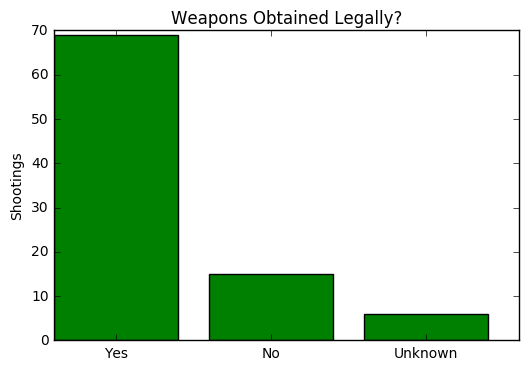

In [278]:
#bar graph for fatalities 

N = 3

ind = np.arange(N)  # the x locations for the groups
width = 0.8 #width of bars

fig, ax = plt.subplots()

g1 = ax.bar(ind, y, width, color = 'g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Shootings')
ax.set_title('Weapons Obtained Legally?')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Yes', 'No', 'Unknown'))



plt.show()

In [248]:
data['Race'].unique()

array(['Asian', 'White', 'Black', nan, 'Latino', 'Other', 'White ',
       'Native American', 'white', 'black', 'unclear'], dtype=object)

In [249]:
data['Race'] = data['Race'].replace('White ', 'White')
data['Race'] = data['Race'].replace('white', 'White')
data1 = data['Race'].dropna()
eth = data1.unique()

In [250]:
len(eth)

8

In [251]:
eth_count = []
for i in range(0,len(eth)):
    count = data['Case'][data['Race'] == eth[i]].count()
    eth_count.append(count)
        
eth_count
        

[8, 56, 7, 7, 5, 3, 9, 1]

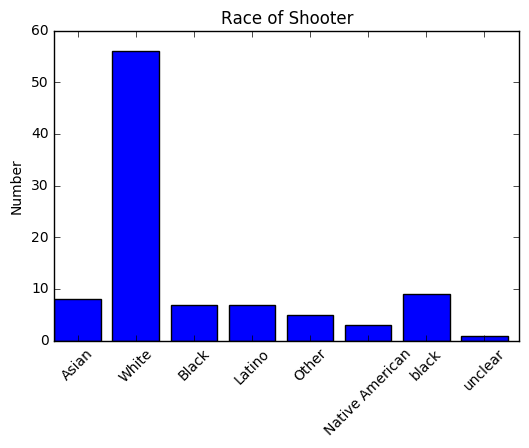

In [252]:
#bar graph for fatalities 

N = len(eth)

ind = np.arange(N)  # the x locations for the groups
width = 0.8 #width of bars

fig, ax = plt.subplots()

g1 = ax.bar(ind, eth_count, width, color = 'b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number')
ax.set_title('Race of Shooter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(eth, rotation = 45)



plt.show()

In [253]:
data['Gender'].unique()

array(['M', 'Male & Female', 'Male', 'Female'], dtype=object)

In [255]:
data['Gender'] = data['Gender'].replace('M', 'Male')
sex = data['Gender'].unique()

In [256]:
gen_count = []
for i in range(0,len(sex)):
    count = data['Case'][data['Gender'] == sex[i]].count()
    gen_count.append(count)
        
gen_count
        

[95, 1, 2]

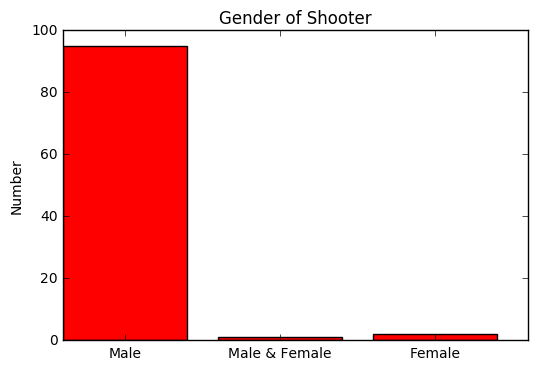

In [262]:
#bar graph for fatalities 

N = len(sex)

ind = np.arange(N)  # the x locations for the groups
width = 0.8 #width of bars

fig, ax = plt.subplots()

g1 = ax.bar(ind, gen_count, width, color = 'red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number')
ax.set_title('Gender of Shooter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sex, rotation = 0)



plt.show()

In [274]:
since10 = len(data['Case'][data['Year'] > 2010])
print ("Number of shootings since 2010: %d" %since10)

Number of shootings since 2010: 46


In [276]:
#wikipedia article states 100 fatalities in 8 attacks that killed more than 4
'''https://en.wikipedia.org/wiki/Terrorism_in_the_United_States#2010%E2%80%93present'''
fatal10 = data['Fatalities'][data['Year'] > 2010].sum()
print ("Number of fatalities since 2010: %d" %fatal10)

Number of fatalities since 2010: 401


In [ ]:
#overlap of 83 fatalities from 5 attacks
#number with that removed is 318 dead over 41 attacks